# LIBRERIAS


In [ ]:
import random as rd
from operator import itemgetter
from random import randint, random


# CLASE CURSO

In [ ]:
class ClaseCurso:
    def __init__(self,codAsignatura,nombre,docente,horario):
        self.codAsignatura=codAsignatura
        self.nombre=nombre
        self.docente=docente
        self.horario=horario
    def mostrar(self):
        print(f'{self.codAsignatura} {self.nombre} {self.docente} {self.horario}')

#CLASE DIA


In [ ]:
class ClaseDia:
    def __init__(self,dia,horaI,horaF,tipo="T"):
        self.dia=dia
        self.horaI=horaI
        self.horaF=horaF
        self.tipo=tipo   #teo = teorico, lab=laboratorio

# CLASE GENETICO

In [ ]:
class claseGenetico():
    def __init__(self,_cursos,_aulas,_n,_listaCursos:list,_cantLaboratorios):
        self.probaMutacion=0.80
        self.probaCruce=0.5
        self.poblacion=None
        self.individuo=None
        self.evaluar=None
        self.fo=None
        self.puntuacion=[]
        self.cursos=_cursos
        self.aulas=_aulas
        self.n=_n
        self.listaCursos=_listaCursos
        self.laboratorios=None
        self.cantidadLaboratorios=_cantLaboratorios

    #Generamos un individuo
    def generarIndividuo(self):
        individuo=[[rd.randint(0,1) for k in range(self.cursos)] for j in range(self.aulas)]
        return individuo
    
    #Generamos la poblacion de individuos
    def generarPoblacion(self):
        self.puntuacion=[]
        self.poblacion=[self.generarIndividuo() for i in range(self.n)]
    #[ [[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]],
    #  [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]] ]

    #Esta funcion nos sirve para seleecionar a aquellos que son
    #mas aptos.
    def NuevaRuleta(self,pais): #SELECCION DE RULETA
        def sortear(fitness_total, indice_a_ignorar=-1):
            ruleta, acumulado, valor_sorteado = [], 0, random()

            if indice_a_ignorar!=-1:
                fitness_total -= valores[0][indice_a_ignorar]

            for indice, i in enumerate(valores[0]):
                if indice_a_ignorar==indice: 
                    continue
                acumulado += i
                ruleta.append(acumulado/fitness_total)
                if ruleta[-1] >= valor_sorteado:
                    return indice

        valores = list(zip(*pais)) 
        
        fitness_total = sum(valores[0])

        #Recuperamos el indice de la molecula mas apto
        indice_padre = sortear(fitness_total) 

        #Recuperamos el indice de la segunda molecula mas apto
        indice_madre = sortear(fitness_total, indice_padre)

        #Recuperamos el valor con el indice
        padre = valores[1][indice_padre]
        madre = valores[1][indice_madre]
        
        return padre, madre
    
    #[ AULAS , AULAS , AULAS , AULAS , AULAS ]
    #[ [0,1,0,1,0,1] ] , [0,1,0,1,0,1] , [0,1,0,1,0,1] ]
    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    def determinarHorariosLaboratorios(self,curso):
        aula=[]
        dias={"LUNES":0,"MARTES":1,"MIÉRCOLES":2,"JUEVES":3,"VIERNES":4,"SÁBADO":5,"SABADO ":5}
        lab=[]
        for curso in curso.horario:
            for num in range(curso.horaI,curso.horaF):
                if(curso.tipo=="P"):
                    lab.append((dias[curso.dia],num))
                else:
                    aula.append((dias[curso.dia],num))
        return lab,aula

    def generarAuxDocentes(self):
        diccionario={}
        for valor in self.listaCursos:
            diccionario[valor.docente]=-1
        return diccionario

    def determinarSiEntraCurso(self,cromosoma):
        aulasDisponibles=[]
        labosDisponibles=[]
        for aula in cromosoma:
            aulaExtra=[]
            labExtra=[]
            for indice in range(len(aula)):
                if(aula[indice]==0):
                    continue
                else:
                    laboratorioBinario,aulasBinario=self.determinarHorariosLaboratorios(self.listaCursos[indice])
                    labExtra+=laboratorioBinario
                    aulaExtra+=aulasBinario
            aulasDisponibles.append(aulaExtra)
            labosDisponibles.append(labExtra)
        return aulasDisponibles,labosDisponibles
    def cantidadRepetidos(self,lista):
        return dict(zip(lista,map(lambda x: lista.count(x),lista)))

    # Encontrar los cursos que se cruzan horas en un mismo aula y laboratorio
    def ECT(self,cromosoma):
        def contarCastigos(aulasDisponibles):
            if(len(aulasDisponibles) in [0,1]):
                return 0
            castigo=0
            for valor in aulasDisponibles:
                diccionario=self.cantidadRepetidos(valor)
            for key in diccionario:
                if(diccionario[key]>1):
                    castigo+=1
            return castigo
        castigoTotal=0
        aulasDisponibles,labosDisponibles=self.determinarSiEntraCurso(cromosoma)
        castigoTotal+=contarCastigos(aulasDisponibles)
        #[[(0, 16), (0, 17)], [(1, 7), (1, 8), (4, 7), (0, 9), (0, 10), (4, 8), (0, 16), (0, 17)], [(0, 16), (0, 17)]]
        totalLabos=[]
        for valor in labosDisponibles:
            totalLabos+=valor
        reparticionDeLabos=[totalLabos[i:i + self.cantidadLaboratorios] for i in range(0, len(totalLabos), self.cantidadLaboratorios)]
        for valor in reparticionDeLabos:
            castigoTotal+=contarCastigos(valor)
        return castigoTotal

    # Calcular los cursos que se repiten en otras aulas
    def ECDAT(self,cromosoma):
        castigo=0
        primero=cromosoma[0]
        for x in range(len(cromosoma)):
            for y in range(len(cromosoma[x])):
                if(cromosoma[x][y]==1):
                    for z in range(len(cromosoma)):
                        if(cromosoma[z][y]==1 and z!=x):
                            castigo+=1
        return castigo//2


    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    #Paul

    def funcionObjetivo(self,cromosoma):
        #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
        #return 1/(1+randint(1,5)+randint(1,5))
        return 1/(1+self.ECT(cromosoma)+2*self.ECDAT(cromosoma))
    def evaluacion(self):
        self.evaluar=[(self.funcionObjetivo(valor),valor) for valor in self.poblacion if(self.funcionObjetivo(valor)<=1)]
                    #   (  FuncionObjetivo(valor),valor)
                    #   (            121         , [[1, 0, 1], [0, 1, 1]])
                    #   (            88          , [[1, 0, 1], [0, 1, 1]])
        
        #Ordenar
        sorted(self.evaluar , key=itemgetter(0))

        puntuacion=0
        # ----------- ALMACENANDO LA PUNTUACION DE CADA GENERACION -----------
        for valor in self.evaluar:
            puntuacion+=valor[0]
        self.puntuacion.append(puntuacion/len(self.evaluar))

        # --------------------- CRUCE -----------------------
        hijos=[]
        # Itearamos cada hijo
        while(len(hijos)<self.n):
            #Almacenamos las moleculas mas aptas en padre y madre
            padre,madre=self.NuevaRuleta(self.evaluar)

            #Generamos un numero entre 0 y 1 con "radom()" y si es menor a la
            #probabilidad de cruce -> Cruzamos padre y madre
            if(self.probaCruce>random()):
                for i in range(len(padre)):
                    for j in range(self.cursos//2):
                        madre[i][j]=padre[i][j]
            hijos.append(madre)

        #------------------ MUTACION ---------------------
        for individuo in hijos:
            #Hacemos lo mismo de cruce, generamos un random y lo comparamos con
            #la probabilidad de MUTACION
            if(self.probaMutacion>random()):
                indice_aleatorio=randint(0, len(individuo)-1)
                indice_aleatorioBinario=randint(0, len(individuo[indice_aleatorio])-1)
                #aQUI CAMBIAMOS LOS BIT Si es 0 a 1   y   de 1 a 0
                if individuo[indice_aleatorio][indice_aleatorioBinario] == 1:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 0
                else:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 1
        self.poblacion=hijos
        None==madre==padre==hijos
    def info(self):
        print("")
        print("------------ INFO ------------")
        print(f'Tam de cursos: {self.cursos}')
        print(f'Tam de aulas : {self.aulas}')
        print(f'Tam de pobl  : {self.n}')
        print(f'Puntuacion   : {self.puntuacion}')
        print("-----------------------------")
        
    def entrenar(self):
            self.evaluacion()
    def obtenerPoblacion(self):
        return self.poblacion
    def obtenerPuntuacion(self):
        return self.puntuacion


#CLASE GENETICO HIBRIDO GREEDY

In [ ]:
class claseGeneticoHibridoGreedy():
    def __init__(self,_cursos,_aulas,_n,_listaCursos:list,_cantLaboratorios):
        self.probaMutacion=0.80
        self.probaCruce=0.5
        self.poblacion=None
        self.individuo=None
        self.evaluar=None
        self.fo=None
        self.puntuacion=[]
        self.cursos=_cursos
        self.aulas=_aulas
        self.n=_n
        self.listaCursos=_listaCursos
        self.laboratorios=None
        self.cantidadLaboratorios=_cantLaboratorios

    #Generamos un individuo
    def generarIndividuo(self):
        individuo=[[rd.randint(0,1) for k in range(self.cursos)] for j in range(self.aulas)]
        return individuo
    
    #Generamos la poblacion de individuos
    def generarPoblacion(self):
        self.puntuacion=[]
        self.poblacion=[self.generarIndividuo() for i in range(self.n)]
    #[ [[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]],
    #  [[0, 1, 1, 1, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 1, 1, 0, 1, 1, 1, 1, 0, 0]] ]
    
    #[ AULAS , AULAS , AULAS , AULAS , AULAS ]
    #[ [0,1,0,1,0,1] ] , [0,1,0,1,0,1] , [0,1,0,1,0,1] ]
    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    def determinarHorariosLaboratorios(self,curso):
        aula=[]
        dias={"LUNES":0,"MARTES":1,"MIÉRCOLES":2,"JUEVES":3,"VIERNES":4,"SÁBADO":5,"SABADO ":5}
        lab=[]
        for curso in curso.horario:
            for num in range(curso.horaI,curso.horaF):
                if(curso.tipo=="lab"):
                    lab.append((dias[curso.dia],num))
                else:
                    aula.append((dias[curso.dia],num))
        return lab,aula

    def generarAuxDocentes(self):
        diccionario={}
        for valor in self.listaCursos:
            diccionario[valor.docente]=-1
        return diccionario

    def determinarSiEntraCurso(self,cromosoma):
        aulasDisponibles=[]
        labosDisponibles=[]
        for aula in cromosoma:
            aulaExtra=[]
            labExtra=[]
            for indice in range(len(aula)):
                if(aula[indice]==0):
                    continue
                else:
                    laboratorioBinario,aulasBinario=self.determinarHorariosLaboratorios(self.listaCursos[indice])
                    labExtra+=laboratorioBinario
                    aulaExtra+=aulasBinario
            aulasDisponibles.append(aulaExtra)
            labosDisponibles.append(labExtra)
        return aulasDisponibles,labosDisponibles
    def cantidadRepetidos(self,lista):
        return dict(zip(lista,map(lambda x: lista.count(x),lista)))

    # Encontrar los cursos que se cruzan horas en un mismo aula y laboratorio
    def ECT(self,cromosoma):
        def contarCastigos(aulasDisponibles):
            if(len(aulasDisponibles) in [0,1]):
                return 0
            castigo=0
            for valor in aulasDisponibles:
                diccionario=self.cantidadRepetidos(valor)
            for key in diccionario:
                if(diccionario[key]>1):
                    castigo+=1
            return castigo
        castigoTotal=0
        aulasDisponibles,labosDisponibles=self.determinarSiEntraCurso(cromosoma)
        castigoTotal+=contarCastigos(aulasDisponibles)
        #[[(0, 16), (0, 17)], [(1, 7), (1, 8), (4, 7), (0, 9), (0, 10), (4, 8), (0, 16), (0, 17)], [(0, 16), (0, 17)]]
        totalLabos=[]
        for valor in labosDisponibles:
            totalLabos+=valor
        reparticionDeLabos=[totalLabos[i:i + self.cantidadLaboratorios] for i in range(0, len(totalLabos), self.cantidadLaboratorios)]
        for valor in reparticionDeLabos:
            castigoTotal+=contarCastigos(valor)
        return castigoTotal

    # Calcular los cursos que se repiten en otras aulas
    def ECDAT(self,cromosoma):
        castigo=0
        primero=cromosoma[0]
        for x in range(len(cromosoma)):
            for y in range(len(cromosoma[x])):
                if(cromosoma[x][y]==1):
                    for z in range(len(cromosoma)):
                        if(cromosoma[z][y]==1 and z!=x):
                            castigo+=1
        return castigo//2


    #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
    #Paul

    def funcionObjetivo(self,cromosoma):
        #[[1, 0, 1, 0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]]
        #return 1/(1+randint(1,5)+randint(1,5))
        return 1/(1+self.ECT(cromosoma)+2*self.ECDAT(cromosoma))


    # USAR EL ALGORITMO GREEDY PARA SELEECIONAR LA SOLUCION OPTIMA
    def AlgoritmoGreddy(self,pais): #SELECCION DE RULETA
        valores = list(zip(*pais))
        #[(0.09090909090909091, 0.2), ([[1, 1, 1, 0, 1], [1, 0, 1, 1, 0], [0, 0, 1, 0, 1]], [[1, 1, 0, 0, 0], [1, 0, 0, 0, 1], [0, 0, 0, 0, 1]])]

        mejorValor = -999
        mejorPos=0
        for indice in range(len(valores[0])):
            if(mejorValor<valores[0][indice]):
                if(valores[0][indice])==1.0:
                    mejorValor=valores[0][indice]
                    mejorPos=indice
                    break
                mejorValor=valores[0][indice]
                mejorPos=indice

        #Recuperamos el indice de la molecula mas apto
        indice_padre = mejorPos

        #Recuperamos el indice de la segunda molecula mas apto
        indice_madre = mejorPos

        #Recuperamos el valor con el indice
        padre = valores[1][indice_padre]
        madre = valores[1][indice_madre]
        
        return padre, madre
    def evaluacion(self):
        self.evaluar=[(self.funcionObjetivo(valor),valor) for valor in self.poblacion if(self.funcionObjetivo(valor)<=1)]
                    #   (  FuncionObjetivo(valor),valor)
                    #   (            121         , [[1, 0, 1], [0, 1, 1]])
                    #   (            88          , [[1, 0, 1], [0, 1, 1]])
        
        #Ordenar
        sorted(self.evaluar , key=itemgetter(0))

        puntuacion=0
        # ----------- ALMACENANDO LA PUNTUACION DE CADA GENERACION -----------
        for valor in self.evaluar:
            puntuacion+=valor[0]
        self.puntuacion.append(puntuacion/len(self.evaluar))

        # --------------------- CRUCE -----------------------
        hijos=[]
        # Itearamos cada hijo
        while(len(hijos)<self.n):
            #Almacenamos las moleculas mas aptas en padre y madre
            padre,madre=self.AlgoritmoGreddy(self.evaluar)

            #Generamos un numero entre 0 y 1 con "radom()" y si es menor a la
            #probabilidad de cruce -> Cruzamos padre y madre
            if(self.probaCruce>random()):
                for i in range(len(padre)):
                    for j in range(self.cursos//2):
                        madre[i][j]=padre[i][j]
            hijos.append(madre)

        #------------------ MUTACION ---------------------
        for individuo in hijos:
            #Hacemos lo mismo de cruce, generamos un random y lo comparamos con
            #la probabilidad de MUTACION
            if(self.probaMutacion>random()):
                indice_aleatorio=randint(0, len(individuo)-1)
                indice_aleatorioBinario=randint(0, len(individuo[indice_aleatorio])-1)
                #aQUI CAMBIAMOS LOS BIT Si es 0 a 1   y   de 1 a 0
                if individuo[indice_aleatorio][indice_aleatorioBinario] == 1:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 0
                else:
                    individuo[indice_aleatorio][indice_aleatorioBinario] = 1
        self.poblacion=hijos
        None==madre==padre==hijos
    def info(self):
        print("")
        print("------------ INFO ------------")
        print(f'Tam de cursos: {self.cursos}')
        print(f'Tam de aulas : {self.aulas}')
        print(f'Tam de pobl  : {self.n}')
        print(f'Puntuacion   : {self.puntuacion}')
        print("-----------------------------")
        
    def entrenar(self):
            self.evaluacion()
    def obtenerPoblacion(self):
        return self.poblacion
    def obtenerPuntuacion(self):
        return self.puntuacion


# INPUT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing


def ordenar_lista_curso(lista):
  lista_dias1=['LUNES','MARTES','MIÉRCOLES','JUEVES','VIERNES','SÁBADO','SABADO ']
  lista_order=[]
  for dia in lista_dias1:
    for k in range(len(lista)):
      #print(dia)
      if lista[k][0]==dia:
        lista_order.append(lista[k])
  return lista_order

def orden_codigo(dataset):
  #print(dataset)
  unicos=dataset['CODIGO'].unique()
  #print(unicos)
  lista_horario=[]
  for u in unicos: #recorremos los valores unicos encontrados
    lista_unica=[]
    for _ in range(len(dataset)):#recorremos todo el data set
      if u==dataset.iloc[_,1]:#verificamos 
        lista_unica.append([dataset.iloc[_,9],dataset.iloc[_,10],dataset.iloc[_,11],dataset.iloc[_,5]])
    #verificamos la lista unica y ordenamos
    #print(lista_unica)
    lista_unica=ordenar_lista_curso(lista_unica)
    #print(lista_unica)
    lista_horario.append(lista_unica)
  return(lista_horario)


def buscar_codigo_docent(dataset):
  #print(dataset)
  unicos=dataset['CODIGO'].unique()
  #print(unicos)
  lista_do=[]
  for u in unicos: #recorremos los valores unicos encontrados de codigos
    for _ in range(len(dataset)):#recorremos todo el data set
      if u==dataset.iloc[_,1]:#verificamos 
        lista_do.append([u,dataset.iloc[_,3],dataset.iloc[_,15]])
  return(lista_do)


def unir_listas(prof,horario):
  lista_unida=[]
  tam=0
  k=0
  for i in horario:
    print(tam)
    lista_unida=prof[tam]+horario[k]
    tam=tam+len(i)
    k=k+1
    print(lista_unida)

#qr nombre docente y codigo
#w horarios cada uno tiene un elemento
def unir_listas(prof,horario):
  lista_unida=[]
  tam=0
  k=0
  for i in horario:
    lista_unir=prof[tam]+[horario[k]]
    tam=tam+len(i)
    k=k+1
    lista_unida.append(lista_unir)
  return(lista_unida)


def convertir_objetos(lista_unida):
  totalCursos=[]
  for i in lista_unida1:
    horario=[]
    #print(i)
    for k in range(len(i[3])):
      horario.append(ClaseDia(i[3][k][0],i[3][k][1],i[3][k][2],i[3][k][3]))
    totalCursos.append(ClaseCurso(i[0],i[1],i[2],horario))
  return(totalCursos)


#------------------------ INPUT PRINCIPAL --------------------------------
dataset = pd.read_csv("cargaAcademica.csv",sep=';')
len(dataset)
dataset_copy = dataset.loc[dataset['CARRERA'] == 'INGENIERIA INFORMATICA']
dataset_copy=dataset_copy.loc[dataset_copy['DOCENTES']!='CURSO DESACTIVADO']

w=orden_codigo(dataset_copy)
qr=buscar_codigo_docent(dataset_copy)
unir_listas(qr,w)
lista_unida1=unir_listas(qr,w)
totalCursos=convertir_objetos(lista_unida1)

In [ ]:
totalCursos

In [ ]:
dataset

,N°,CODIGO,CARRERA,CURSO,CRED.,TIPO,GPO,HT,HP,DIA,HR/INICIO,HR/FIN,AULA,AFORO LÍMITE,MATRICULADOS,DOCENTES
0,1,IF060AIN,INGENIERIA INFORMATICA,MUSICA,2,P,A,0,2,VIERNES,11,13,IN107,50.0,48,OLMER CLAUDIO VILLENA LEON
1,2,IF060AIN,INGENIERIA INFORMATICA,MUSICA,2,P,A,0,2,SÁBADO,9,11,IN107,50.0,48,OLMER CLAUDIO VILLENA LEON
2,3,IF063AIN,INGENIERIA INFORMATICA,QUECHUA,2,P,A,0,2,VIERNES,7,9,IN202,50.0,29,RAIMAR ABARCA MORA
3,4,IF063AIN,INGENIERIA INFORMATICA,QUECHUA,2,P,A,0,2,SÁBADO,7,9,IN202,50.0,29,RAIMAR ABARCA MORA
4,5,IF063BIN,INGENIERIA INFORMATICA,QUECHUA,2,P,B,0,2,VIERNES,14,16,IN202,50.0,23,LISHA SABAH DIAZ CACERES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,335,IF902AMD / IF902AOD,MEDICINA HUMANA / ODONTOLOGÍA,TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACIÓN,3,T,A,2,0,MIÉRCOLES,16,18,VIRTUAL,NaN,52,LISETH URPY SEGUNDO CARPIO
335,336,IF902AMD / IF902AOD,MEDICINA HUMANA / ODONTOLOGÍA,TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACIÓN,3,P,A,0,2,LUNES,16,18,VIRTUAL,NaN,52,LISETH URPY SEGUNDO CARPIO
336,337,IF902ATU,TURISMO,TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACIÓN,3,T,A,2,0,MIÉRCOLES,9,11,VIRTUAL,NaN,55,EMILIO PALOMINO OLIVERA
337,338,IF902ATU,TURISMO,TECNOLOGIAS DE LA INFORMACION Y LA COMUNICACIÓN,3,P,A,0,2,LUNES,9,11,VIRTUAL,NaN,55,VANESA LAVILLA ALVAREZ


# PRUEBAS

## Pruebas Algoritmo Genetico

    Iteración  Tiempo de ejecución
0           1            17.269562
1           2            13.938836
2           3            14.644900
3           4            15.453417
4           5            15.460603
5           6            14.142626
6           7            14.475558
7           8            14.546813
8           9            14.208892
9          10            13.874411
10         11            14.122252
11         12            13.492953
12         13            13.938710
13         14            13.594846
14         15            14.025112
15         16            14.261368
16         17            13.821245
17         18            14.342440
18         19            13.968910
19         20            13.334642
Grafico de Tiempos para 20 iteraciones del programa


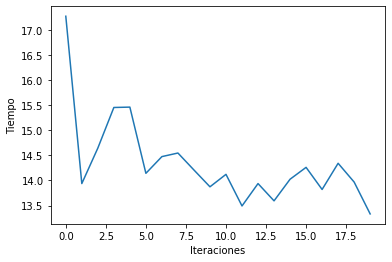

El promedio de tiempo de las iteraciones es: 14.345904874801636
Ultimo valor: 0.00023329406573791077
---- Generado correctamente -------


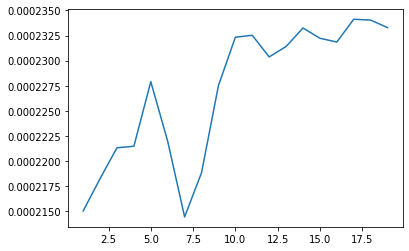

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd

#Inicializamos la clase genetico
var = claseGenetico(_cursos=len(totalCursos),_aulas=16,_n=40,_listaCursos=totalCursos,_cantLaboratorios=13)

#Damos el valor para iterar las generaciones
generaciones = 20



# Inicializamos variable para actualizar el ultimo valor
ultimovalor = 0

tiempos1 = []
mejorValorGenetico=[]
#Iteramos 20 veces
for i in range(20):
    start_time = time.time() #Tomamos el tiempo antes de ejecutar el programa
     
    #Generamos la primera poblacion
    var.generarPoblacion()
    aux=1
    #--------------------------------------------------------------
    #Empezamos con las iteraciones
    while aux<generaciones:
        #Entrenamos nuestra poblacion con cada iteracion
        var.entrenar()
        if(var.puntuacion[-1]==1.0):
            break

        aux+=1
    end_time = time.time()
    mejorValorGenetico.append(max(var.puntuacion))
    tiempos1.append(end_time - start_time) #Tomamos el tiempo después de ejecutar y lo agregamos a la lista

#Creamos un DataFrame con los tiempos de ejecución
df1 = pd.DataFrame({"Iteración": range(1,21), 'Tiempo de ejecución': tiempos1})
#Mostramos la tabla
print(df1)

# GRAFICO DE TIEMPOS
m = [tiempos1[i] for i in range(0,20)]
print("Grafico de Tiempos para 20 iteraciones del programa")
plt.plot(m)
plt.xlabel('Iteraciones')
plt.ylabel('Tiempo')
plt.show()

# IMPRIMIR PROMEDIO DE TIEMPOS
print("El promedio de tiempo de las iteraciones es: " + str(df1['Tiempo de ejecución'].mean()))

# GUARDAMOS EL ULTIMO VALOR
ultimovalor = var.puntuacion[-1]

#--------------------------------------------------------------

# Ver datos
# ultimo valor 
print("Ultimo valor: " + str(ultimovalor))
mejorValorGenetico.sort()
y=var.obtenerPuntuacion()
x=[i for i in range(1,len(y)+1)]
print("---- Generado correctamente -------")
plt.plot(x,y)
plt.show()

## Pruebas Algoritmo Genetico Hibrido con Greedy

    Iteración  Tiempo de ejecución
0           1            30.507057
1           2            30.334209
2           3            32.664119
3           4            30.516906
4           5            30.110153
5           6            29.425671
6           7            31.688082
7           8            30.266505
8           9            29.972996
9          10            30.793597
10         11            31.002743
11         12            30.078836
12         13            30.747841
13         14            31.810684
14         15            30.903791
15         16            32.094300
16         17            28.738332
17         18            30.174390
18         19            31.429231
19         20            30.994895
Grafico de Tiempos para 20 iteraciones del programa


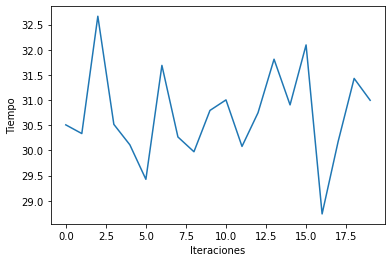

El promedio de tiempo de las iteraciones es: 30.712716829776763
Ultimo valor: 0.0002118644067796611
---- Generado correctamente -------


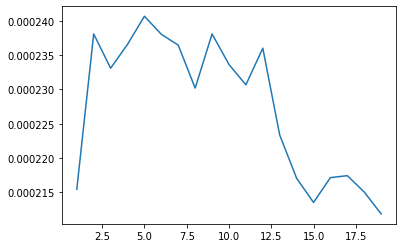

In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd
#Inicializamos la clase genetico
var = claseGeneticoHibridoGreedy(_cursos=len(totalCursos),_aulas=16,_n=40,_listaCursos=totalCursos,_cantLaboratorios=13)

#Damos el valor para iterar las generaciones
generaciones = 20

#Generamos la primera poblacion

# Inicializamos variable para actualizar el ultimo valor
ultimovalor = 0

tiempos2 = []
mejorValorHibrido=[]
#Iteramos 20 veces
for i in range(20):
    start_time = time.time() #Tomamos el tiempo antes de ejecutar el programa
   
    var.generarPoblacion()
    aux=1
    #--------------------------------------------------------------
    #Empezamos con las iteraciones
    while aux<generaciones:
        #Entrenamos nuestra poblacion con cada iteracion
        var.entrenar()
        if(var.puntuacion[-1]==1.0):
            break

        aux+=1
    end_time = time.time()
    tiempos2.append(end_time - start_time) #Tomamos el tiempo después de ejecutar y lo agregamos a la lista
    mejorValorHibrido.append(max(var.puntuacion))
#Creamos un DataFrame con los tiempos de ejecución
df2 = pd.DataFrame({"Iteración": range(1,21), 'Tiempo de ejecución': tiempos2})
#Mostramos la tabla
print(df2)

# GRAFICO DE TIEMPOS
m = [tiempos2[i] for i in range(0,20)]
print("Grafico de Tiempos para 20 iteraciones del programa")
plt.plot(m)
plt.xlabel('Iteraciones')
plt.ylabel('Tiempo')
plt.show()

# IMPRIMIR PROMEDIO DE TIEMPOS
print("El promedio de tiempo de las iteraciones es: " + str(df2['Tiempo de ejecución'].mean()))

# GUARDAMOS EL ULTIMO VALOR
ultimovalor = var.puntuacion[-1]

#--------------------------------------------------------------
mejorValorHibrido.sort()
# Ver datos
# ultimo valor 
print("Ultimo valor: " + str(ultimovalor))

y=var.obtenerPuntuacion()
x=[i for i in range(1,len(y)+1)]
print("---- Generado correctamente -------")
plt.plot(x,y)
plt.show()

    Iteración  Tiempo de ejecución GENETICO  Tiempo de ejecución GREEDY
0           1                     17.269562                   30.507057
1           2                     13.938836                   30.334209
2           3                     14.644900                   32.664119
3           4                     15.453417                   30.516906
4           5                     15.460603                   30.110153
5           6                     14.142626                   29.425671
6           7                     14.475558                   31.688082
7           8                     14.546813                   30.266505
8           9                     14.208892                   29.972996
9          10                     13.874411                   30.793597
10         11                     14.122252                   31.002743
11         12                     13.492953                   30.078836
12         13                     13.938710                   30

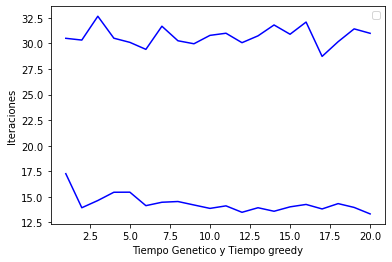

Tiempo promedio algorimot genetico:  14.345904874801636
Tiempo promedio algorimot greedy:  30.712716829776763


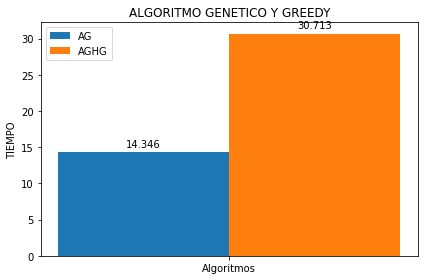

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_frames = pd.DataFrame({"Iteración": range(1,21), 'Tiempo de ejecución GENETICO': tiempos1,'Tiempo de ejecución GREEDY': tiempos2})

print(df_frames)

# Toma las dos columnas X1 y X2 como valores para el eje x
x = df_frames["Iteración"]

# Toma la columna Y como valores para el eje y
y = df_frames[['Tiempo de ejecución GENETICO', 'Tiempo de ejecución GREEDY'] ]

# Crea el gráfico de líneas
plt.plot(x, y, 'b-')
plt.xlabel('Tiempo Genetico y Tiempo greedy')
plt.ylabel('Iteraciones')
plt.legend()
plt.show()



# MUESTRA DE TABLAS COMPARATIVAS SEGUN AL TIEMPO
asistencia = ['Algoritmos']
print("Tiempo promedio algorimot genetico: ",df_frames['Tiempo de ejecución GENETICO'].mean())
print("Tiempo promedio algorimot greedy: ",df_frames['Tiempo de ejecución GREEDY'].mean())
men_means = [round(df_frames['Tiempo de ejecución GENETICO'].mean(),3)]
women_means = [round(df_frames['Tiempo de ejecución GREEDY'].mean(),3)]

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(asistencia))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, men_means, width, label='AG')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, women_means, width, label='AGHG')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('TIEMPO')
ax.set_title('ALGORITMO GENETICO Y GREEDY')
ax.set_xticks(x)
ax.set_xticklabels(asistencia)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('comparacionTiempoEjecucion.png')
#Mostramos la grafica con el metodo show()
plt.show()



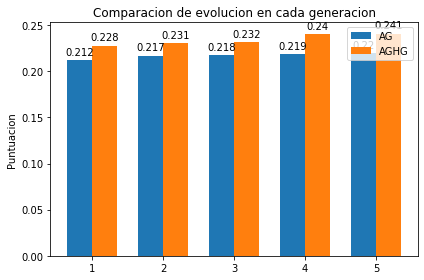

In [ ]:
mejorValorv1=[round(valor*1000,3) for valor in mejorValorGenetico[:5]]
mejorValorv2=[round(valor*1000,3) for valor in mejorValorHibrido[:5]]
asistencia = range(1,6)
men_means = mejorValorv1
women_means = mejorValorv2

#Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(asistencia))
#tamaño de cada barra
width = 0.35

fig, ax = plt.subplots()

#Generamos las barras para el conjunto de hombres
rects1 = ax.bar(x - width/2, men_means, width, label='AG')
#Generamos las barras para el conjunto de mujeres
rects2 = ax.bar(x + width/2, women_means, width, label='AGHG')

#Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Puntuacion')
ax.set_title('Comparacion de evolucion en cada generacion')
ax.set_xticks(x)
ax.set_xticklabels(asistencia)
#Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend()

def autolabel(rects):
    """Funcion para agregar una etiqueta con el valor en cada barra"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#Añadimos las etiquetas para cada barra
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig('comparacionEvolucion.png')
#Mostramos la grafica con el metodo show()
plt.show()